In [4]:
from plotting import import_data
from matplotlib import pyplot as plt; plt.style.use("ggplot")
import numpy as np



In [5]:
t_alt_primary,alt_primary = import_data("primary.csv",variable="altitude",n_avg=50)
t_alt_backup,alt_backup = import_data("backup.csv",variable="altitude",n_avg=50)
t_vel_primary,vel_primary = import_data("primary.csv",variable="velocity",n_avg=50)
t_vel_backup,vel_backup = import_data("backup.csv",variable="velocity",n_avg=50)

prim = np.column_stack((np.array(t_alt_primary).T, np.array(alt_primary).T, np.array(vel_primary).T))
back = np.column_stack((np.array(t_alt_backup).T, np.array(alt_backup).T, np.array(vel_backup).T))
# plt.plot(prim[0:][0],prim[0:][1])

np.savetxt("primary_filtered.csv",prim,delimiter=",")
np.savetxt("backup_filtered.csv",back, delimiter=",")


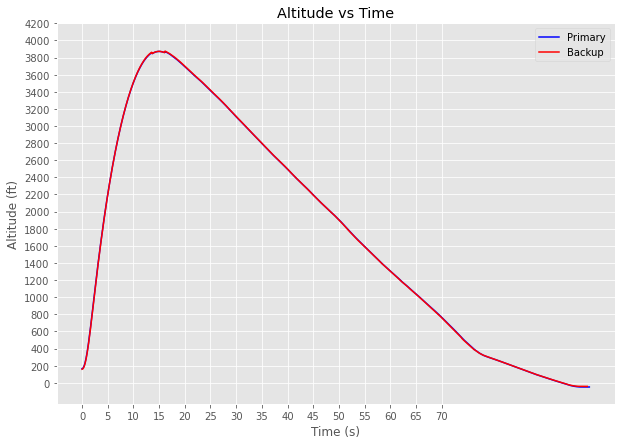

In [8]:
fig, ax = plt.subplots(figsize=(10,7))
ax.plot(t_alt_primary,alt_primary,"-b",label="Primary")
ax.plot(t_alt_backup,alt_backup,"-r",label="Backup")
ax.set(title="Altitude vs Time",xlabel="Time (s)",ylabel= "Altitude (ft)")
ax.legend()
plt.yticks(np.arange(0,4400,200))
plt.xticks(np.arange(0,75,5))
plt.show()


In [9]:
t_vel_primary,vel_primary = import_data("test-launch-1-primary.csv",variable="velocity",n_avg=50)
t_vel_backup,vel_backup = import_data("test-launch-1-backup.csv",variable="velocity",n_avg=50)

vel_primary = [i * 0.000889 for i in vel_primary] # convert fps to mach number
vel_backup = [i * 0.000889 for i in vel_backup]

# Cut off the bad stuff
t_vel_primary = t_vel_primary[0:250]
t_vel_backup = t_vel_backup[0:250]
vel_primary = vel_primary[0:250]
vel_backup = vel_backup[0:250]


FileNotFoundError: [Errno 2] No such file or directory: 'test-launch-1-primary.csv'

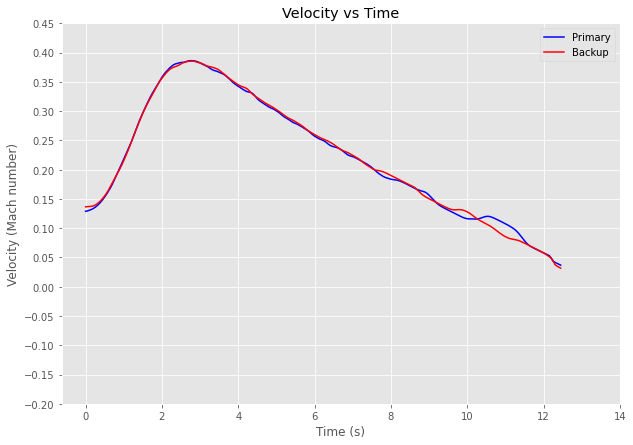

In [81]:
fig, ax = plt.subplots(figsize=(10,7))
ax.plot(t_vel_primary,vel_primary,"-b",label="Primary")
ax.plot(t_vel_backup,vel_backup,"-r",label="Backup")
ax.set(title="Velocity vs Time",xlabel="Time (s)",ylabel= "Velocity (Mach number)")
ax.legend()
plt.yticks(np.arange(-0.2,0.5,0.05))
plt.xticks(np.arange(0,16,2))
plt.show()
